In [1]:
using NCDatasets
using Plots, ColorSchemes
using DataFrames
using SparseArrays, LinearAlgebra, Statistics

In [2]:
ds = NCDataset("/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/Wi100y_231011_23:28_8P20Z13B5D.nc")

Dataset: /home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/Wi100y_231011_23:28_8P20Z13B5D.nc
Group: /

Dimensions
   np = 8
   nb = 13
   nz = 20
   nn = 1
   nd = 5
   ndepth = 89
   ndepth1 = 90
   nrec = 366001
   nprey = 21

Variables
  p   (89 × 8 × 366001)
    Datatype:    Float64 (Float64)
    Dimensions:  ndepth × np × nrec
    Attributes:
     units                = mmol/m3 C biomass

  b   (89 × 13 × 366001)
    Datatype:    Float64 (Float64)
    Dimensions:  ndepth × nb × nrec
    Attributes:
     units                = mmol/m3 C biomass

  z   (89 × 20 × 366001)
    Datatype:    Float64 (Float64)
    Dimensions:  ndepth × nz × nrec
    Attributes:
     units                = mmol/m3 C biomass

  n   (89 × 1 × 366001)
    Datatype:    Float64 (Float64)
    Dimensions:  ndepth × nn × nrec
    Attributes:
     units                = mmol/m3 C OM

  d   (89 × 5 × 366001)
    Datatype:    Float64 (Float64)
    Dimensions:  ndepth × nd × nrec
    Attributes:
     units     

In [54]:
function final_year(vars, ds)
    # 100 ts each day, 1 in 5 recorded (i.e. 20 each day)
    # final year = 366 * 20 = 7320 recorded ts

    final_yr = Vector{Any}()

    for v in vars
        if v != "o"
            append!(final_yr, [ds[v][:, :, end-7319:end]])
        else
            append!(final_yr, [ds[v][:, end-7319:end]])
        end
    end

    return final_yr

end

function get_zc(H)

    dz = 10
    zc = [dz/2 : dz : H - dz/2;] 

    return zc

end

get_zc (generic function with 1 method)

In [223]:
n, p, z, b, d, o = final_year(["n", "p", "z", "b", "d", "o"], ds)

6-element Vector{Any}:
 [0.027521083644712792; 0.02780980871465707; … ; 0.6768924560061848; 0.6768766683109173;;; 0.027540470648903255; 0.0278294861248993; … ; 0.6775562810627432; 0.6775404060338212;;; 0.027559400020547756; 0.027848698283752787; … ; 0.6782195665816123; 0.6782036049504452;;; … ;;; 0.028530627499021546; 0.028830533544433594; … ; 0.7516960086158546; 0.7516728328515572;;; 0.028533959517350643; 0.02883387840059553; … ; 0.7523164007282404; 0.7522931758982365;;; 0.02853723097763239; 0.0288371621494234; … ; 0.7529365558114357; 0.752913282053507]
 [4.170947653643173e-305 4.643377459857892e-305 … 0.5956840735865546 0.0149847148149127; 4.16730870265371e-305 4.642188534130581e-305 … 0.5952755397201361 0.015008128002298109; … ; 2.224023732953112e-305 2.225041928413204e-305 … 8.645974022456656e-18 3.858947654701244e-17; 2.2247871786904451e-305 2.2243624957743042e-305 … 8.537955890475441e-18 3.810736019871875e-17;;; 4.170947653643173e-305 4.643377459857892e-305 … 0.5942755871311939 0

In [56]:
size(p)

(89, 8, 7320)

In [ ]:
zc = get_zc(500)

In [225]:
depth = -zc
data = collect(eachslice(p[1:50, 5, :], dims=2))

7320-element Vector{SubArray{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}}:
 [0.7993378335268564, 0.7982865551883421, 0.7960087399275475, 0.7922876755590519, 0.7868213699921113, 0.779169446658528, 0.7686945462665713, 0.7544727105699377, 0.7351524502850297, 0.7089690468638511  …  4.846807645642096e-11, 2.2050962651241875e-11, 1.0197670760291953e-11, 4.796315919295906e-12, 2.2954047436113735e-12, 1.118263550604856e-12, 5.54787376185318e-13, 2.8037829615861155e-13, 1.4438037704953523e-13, 7.577052778333604e-14]
 [0.79827147415108, 0.7972213699141177, 0.7949464540823218, 0.7912307432415732, 0.7857730847819182, 0.7781340192695501, 0.7676776850506687, 0.7534847032936127, 0.7342159646157648, 0.7081254729742463  …  4.8468076456420926e-11, 2.2050962651241865e-11, 1.0197670760291953e-11, 4.796315919295906e-12, 2.2954047436113735e-12, 1.118263550604856e-12, 5.54787376185318e-13, 2.8037829615861155e-13, 1.4438037704953523e-13, 7.577052778333604e-14]
 [0.797214475

In [ ]:
length(data)
ts = collect(1:(length(data)))

In [ ]:
daily_data = data[1:20:end]
days = collect(1:(length(daily_data)))

In [228]:
zz =  Array{Float64}(undef, size(depth, 1), size(daily_data, 1))
zz_ts = Array{Float64}(undef, size(depth, 1), size(data, 1))

50×7320 Matrix{Float64}:
 2.37531e-315  0.013866  0.001462  0.013866  …  0.103643  0.968814  0.455168
 1.37265e-315  1.0       0.000466  1.0          1.0       0.825105  1.0
 0.0           0.001462  0.013866  0.001462     0.983061  0.244967  0.988362
 0.0           0.000466  1.0       0.000466     0.744827  1.0       0.998364
 0.001462      0.013866  0.001462  0.013866     0.139721  0.956319  0.644924
 0.000466      1.0       0.000466  1.0       …  1.0       0.876214  1.0
 0.013866      0.001462  0.013866  0.001462     0.97757   0.327757  0.98625
 1.0           0.000466  1.0       0.000466     0.78183   1.0       0.712047
 0.001462      0.013866  0.001462  0.013866     0.185374  0.946401  0.102676
 0.000466      1.0       0.000466  1.0          1.0       0.935809  1.0
 ⋮                                           ⋱                      
 0.000466      1.0       0.000466  1.0          1.0       0.825105  1.0
 0.013866      0.001462  0.013866  0.001462     0.983061  0.244967  0.988362
 1.

In [218]:
for i in eachindex(depth)
    for j in eachindex(days)
        zz[i, j] = daily_data[j][i]
    end
end

In [229]:
for i in eachindex(depth)
    for j in eachindex(ts)
        zz_ts[i, j] = data[j][i]
    end
end

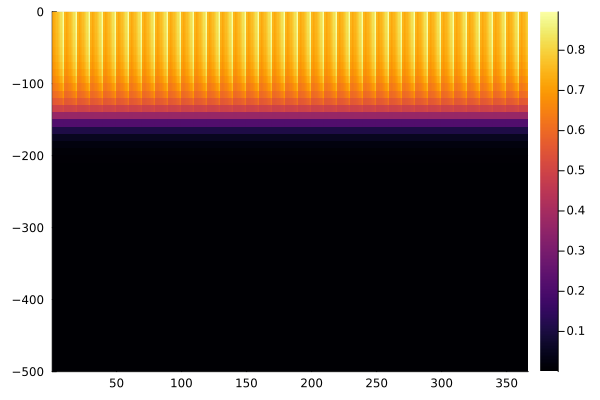

In [220]:
heatmap(days, reverse(depth), reverse(zz))

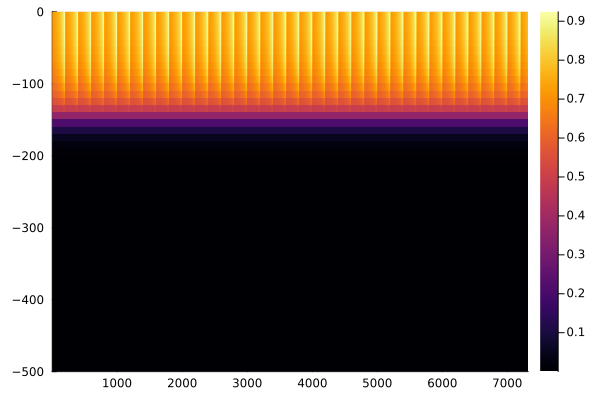

In [230]:
heatmap(ts, reverse(depth), reverse(zz_ts))

In [ ]:
data = collect(eachslice(b[1:50, 9, :], dims=2))
daily_data = data[1:20:end]

In [221]:
zz =  Array{Float64}(undef, size(depth, 1), size(daily_data, 1))
for i in eachindex(depth)
    for j in eachindex(days)
        zz[i, j] = daily_data[j][i]
    end
end

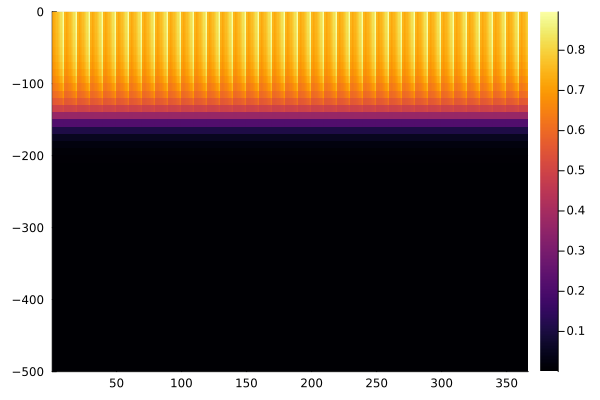

In [222]:
heatmap(days, reverse(depth), reverse(zz))

In [ ]:
data = collect(eachslice(b[1:50, 9, :], dims=2))
daily_data = data[1:20:end]